# Задача 1

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

os.chdir(r"/content/gdrive/MyDrive/Samsung Kaggle/Task 1. Critical temperature of superconductors")
#print(os.getcwd())

/content/gdrive/MyDrive/Samsung Kaggle/Task 1. Critical temperature of superconductors


In [ ]:
# иморитирование всех необходимых библиотек
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import learning_curve 
from sklearn.linear_model import ElasticNetCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
# Считываем тренировочные данные
train = pd.read_csv("train.csv")
formula_train = pd.read_csv("formula_train.csv")

print(f"Train dataset shape: {train.shape}")
print(f"Train_formula dataset shape: {formula_train.shape}")

Train dataset shape: (17010, 82)
Train_formula dataset shape: (17010, 88)


In [ ]:
# Считываем тестовые данные
test = pd.read_csv("test.csv")
formula_test = pd.read_csv("formula_test.csv")

print(f"Test dataset shape: {test.shape}")
print(f"Test_formula dataset shape: {formula_test.shape}")

Test dataset shape: (4253, 81)
Test_formula dataset shape: (4253, 87)


In [ ]:
formula_train = formula_train.drop(columns=['critical_temp'])

train_full = pd.concat([train, formula_train], axis=1)

print(f"Full Train dataset shape: {train_full.shape}")

Full Train dataset shape: (17010, 169)


In [ ]:
# Удалим из данных ненужную колонку 'material'
train_full.drop(columns=['material'], inplace=True)

In [ ]:
# Выделим из набора данных вектор признаков и вектор ответов
X = train_full.drop(columns=['critical_temp'])
y = train_full['critical_temp']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

Features shape: (17010, 167)
Target shape: (17010,)


In [ ]:
test_full = pd.concat([test, formula_test], axis=1)

print(f"Full Test dataset shape: {test_full.shape}")

Full Test dataset shape: (4253, 168)


In [ ]:
# Удалим из данных ненужную колонку 'material'
test_full.drop(columns=['material'], inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print(f'Train dataset size: {X_train.shape}, {y_train.shape}')
print(f'Test dataset size: {X_test.shape}, {y_test.shape}')

Train dataset size: (11907, 167), (11907,)
Test dataset size: (5103, 167), (5103,)


In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 275.013, test: 278.712
R^2 train: 0.768, test: 0.761


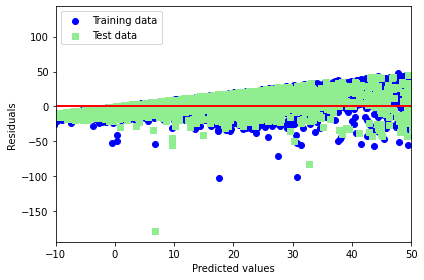

In [ ]:
plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()

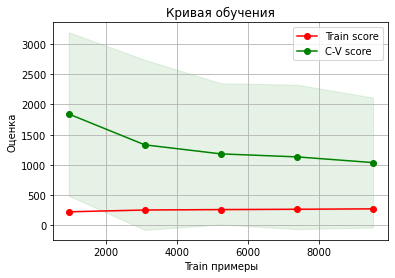

In [ ]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
 
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Train примеры")
    plt.ylabel("Оценка")
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring=make_scorer(mean_squared_error))
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Train score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="C-V score")

    plt.legend(loc="best")
    return plt

plot_learning_curve(model, "Кривая обучения", X_train, y_train, cv=5);

In [ ]:
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
print('Slope: {:.2f}'.format(model.coef_[0]))
print('Intercept: {:.2f}'.format(model.intercept_))

Slope: 0.82
Intercept: -7.45


In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y.values.reshape(-1, 1)).flatten()
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_std, y_std, test_size=0.3, random_state=0)

In [ ]:
X_train_scaled.std(), X_train_scaled.mean()

(0.9669360314556489, -0.0008092060179821469)

In [ ]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train_scaled)
y_train_pred = lasso.predict(X_train_scaled)
y_test_pred = lasso.predict(X_test_scaled)
print(lasso.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[ 0.02530025 -0.         -0.         -0.         -0.          0.
  0.06508695  0.02886593 -0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.02661913
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.05492133 -0.          0.
  0.         -0.         -0.         -0.         -0.          0.
  0.          0.         -0.          0.         -0.         -0.
 -0.         -0.05521845 -0.00738456  0.          0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.          0.          0.          0.34824267 -0.
 -0.01941442 -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.01027437 -0.          0.         -0.
 -0.         -0.          0.         -0.          0.          0.
  0.         -0. 

In [ ]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(X_train_scaled, y_train_scaled)
y_train_pred = ridge.predict(X_train_scaled)
y_test_pred = ridge.predict(X_test_scaled)
print(ridge.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[ 5.57123035e-02  8.51233529e-01 -1.25504029e+00 -4.62429842e-01
  7.95263608e-01 -2.13910836e-01 -2.53872818e-02  3.02366198e-01
  8.21503171e-02 -3.06776450e-01  1.11302448e-02 -4.01330783e-01
  3.11568372e-01  2.70772472e-01 -7.39605009e-02 -1.30566567e-01
  5.76776841e-01  3.90677943e-01  1.22559334e-01 -2.93845689e-01
 -1.04760468e-01 -2.92914388e-01  1.32383125e+00  1.41402122e-01
 -1.33666056e+00 -6.01787614e-01  2.91263465e-01  1.28487532e-01
 -6.78858721e-02 -2.57216510e-01  4.22487190e-02 -4.56531562e-01
  4.80473400e-01  7.62325824e-02 -6.90039524e-02 -4.35466103e-02
  2.79157643e-03 -1.33707232e-01 -4.23611836e-02  1.92018807e-01
 -5.98586374e-02 -1.74036421e-02  3.33788506e-01  8.69069523e-02
 -4.02438974e-01  1.01807681e-01 -1.53481786e-01 -5.70281921e-01
 -6.05016499e-02  7.18248502e-01 -2.83334268e-01  4.39467023e-01
 -7.69135043e-01 -2.67495445e-01  5.07422508e-01 -2.28852557e-01
  2.26346361e-01 -8.62404647e-02  1.99748504e-01 -2.70744446e-01
  1.86590780e-01 -3.61075

In [ ]:
from sklearn.linear_model import ElasticNet

en = ElasticNet(alpha=0.1, l1_ratio=0.5)
en.fit(X_train_scaled, y_train_scaled)
y_train_pred = en.predict(X_train_scaled)
y_test_pred = en.predict(X_test_scaled)
print(en.coef_)

print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train_scaled, y_train_pred),
        mean_squared_error(y_test_scaled, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train_scaled, y_train_pred),
        r2_score(y_test_scaled, y_test_pred)))

[ 0.02818888 -0.         -0.         -0.         -0.          0.
  0.0842759   0.03292459 -0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.05005328
 -0.          0.          0.         -0.          0.         -0.
 -0.          0.          0.          0.06770367 -0.          0.
  0.         -0.         -0.         -0.03686596 -0.          0.
  0.          0.         -0.         -0.         -0.         -0.
 -0.         -0.02538241 -0.06313052 -0.         -0.          0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.          0.          0.         -0.         -0.         -0.
 -0.00739048  0.          0.04013459 -0.         -0.          0.
  0.          0.          0.          0.          0.25143805 -0.
 -0.         -0.         -0.          0.          0.         -0.
 -0.         -0.         -0.08244078 -0.          0.          0.
 -0.         -0.          0.         -0.          0.00590959  0.
  0.         -0. 

In [ ]:
y_pred_test = model.predict(test_full)
y_pred_test

array([42.11079012, 25.40662317, 68.5848528 , ...,  0.15656144,
       18.54899465, 18.54899465])

In [ ]:
y_pred_test = pd.DataFrame(y_pred_test, columns=['critical_temp'])
y_pred_test = y_pred_test.reset_index()
y_pred_test

,index,critical_temp
0,0,42.110790
1,1,25.406623
2,2,68.584853
3,3,62.682028
4,4,66.684339
...,...,...
4248,4248,15.757331
4249,4249,2.410118
4250,4250,0.156561
4251,4251,18.548995


In [ ]:
y_pred_test.to_csv("predict.csv", index=False)